<a href="https://colab.research.google.com/github/Virajbiz98/Python_Learning/blob/main/LangGraph/langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install langgraph -q

Simple Graph

In [20]:
from typing import TypedDict

In [40]:
class Agentstate(TypedDict):
  num1 : int
  num2 : int
  operation : str
  result : int

In [53]:
def addition(state:Agentstate) -> Agentstate:
  state["result"] = state["num1"] + state["num2"]
  return state

def substraction(state:Agentstate) -> Agentstate:
  state["result"] = state["num1"] - state["num2"]
  return state

def multiplication(state:Agentstate) -> Agentstate:
  state["result"] = state["num1"] * state["num2"]
  return state

def division(state:Agentstate) -> Agentstate:
  state["result"] = state["num1"] / state["num2"]
  return state

def decision_node(state:Agentstate) -> Agentstate:
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "substraction_operation"
  elif state["operation"] == "*":
    return "multiplication_operation"
  elif state["operation"] == "/":
    return "division_operation"


In [54]:
from langgraph.graph import StateGraph, START, END

In [55]:
workflow = StateGraph(Agentstate)

workflow.add_node("addition", addition)
workflow.add_node("substraction", substraction)
workflow.add_node("multiplication", multiplication)
workflow.add_node("division", division)
workflow.add_node("router", lambda state:state)

workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_operation": "addition",
        "substraction_operation": "substraction",
        "multiplication_operation": "multiplication",
        "division_operation": "division"
    }
)
workflow.add_edge("addition", END)
workflow.add_edge("substraction", END)
workflow.add_edge("multiplication", END)
workflow.add_edge("division", END)

app = workflow.compile()

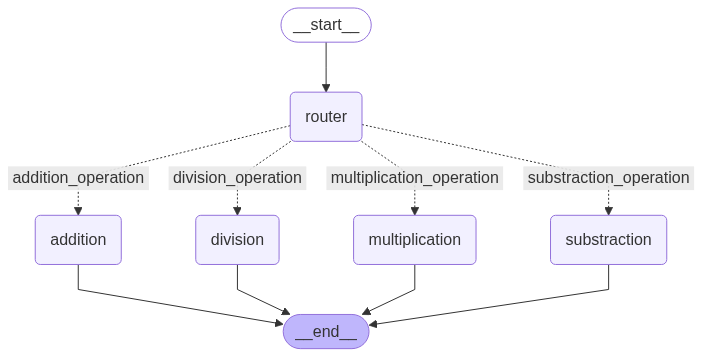

In [56]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [57]:
result = app.invoke({"num1":30,"num2": 34, "operation":"*"})
print(result['result'])

1020
